In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from matplotlib.colors import ListedColormap

#from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
#from adspy_shared_utilities import plot_fruit_knn

In [2]:
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# convert to dataframe
digits_df = pd.DataFrame(X_digits, columns=digits.feature_names)
digits_df['target'] = pd.Series(digits.target)
counts = digits_df.target.value_counts(ascending=True)
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")

X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, random_state=0)

Distribution of labelled samples: 
8    174
2    177
0    178
7    179
9    180
4    181
6    181
1    182
5    182
3    183
Name: target, dtype: int64
-------------------------------------------


In [3]:
clf = SVC(kernel = "rbf",
         probability = True).fit(X_train_digits, y_train_digits)

predictions_digits = clf.predict(X_test_digits)
confusion = confusion_matrix(y_test_digits, 
                             predictions_digits)

print('SVC \n', confusion)

# Combined report with all  metrics
print(classification_report(y_test_digits, 
                            predictions_digits, 
                            #target_names=pd.DataFrame(digits.target_names)
                           ))

SVC 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg 

In [4]:
# predicted probability of class membership
y_proba_clf = clf.predict_proba(X_test_digits)
y_proba_list = list(zip(y_test_digits[0:20], y_proba_clf[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(2, 0.0004743751373334414),
 (8, 0.009476439245859336),
 (2, 0.00036221369354029964),
 (6, 0.0031193725222070636),
 (6, 0.0006790776862299733),
 (7, 0.0050470476807304605),
 (1, 0.9412309800700396),
 (9, 0.0016930184949150902),
 (8, 0.0008321985037822009),
 (5, 0.0009687526440570117),
 (2, 0.0006731196401947544),
 (8, 0.005563780802694559),
 (6, 0.001654883275730042),
 (6, 0.0018982788046241674),
 (6, 0.0034774577508790584),
 (6, 0.002019622524658274),
 (1, 0.9777483262007923),
 (0, 0.00031013567554109367),
 (5, 0.00024024755323183035),
 (8, 0.0006488195423744134)]

In [5]:
y_scores_clf = clf.decision_function(X_test_digits)
y_score_list = list(zip(y_test_digits[0:20], y_scores_clf[0:20]))
# show the decision_function scores for first 20 instances
y_score_list_df = pd.DataFrame(y_score_list)
y_score_list_df.columns = ["target", "decision function score"]
y_score_list_df.head()

,target,decision function score
0,2,"[0.7256711600139722, 4.8612766896188075, 9.309..."
1,8,"[-0.27752466958055794, 3.996597772019504, 5.05..."
2,2,"[-0.2913896977406783, 6.2066850509525695, 9.31..."
3,6,"[4.906228243841324, 2.7585524456907318, 3.8019..."
4,6,"[5.152257375350142, 0.7284027273098104, 3.8360..."


In [6]:
y_score_list_df.loc[0,:]["decision function score"]

array([ 0.72567116,  4.86127669,  9.30983253,  8.26057388,  1.72266476,
        2.79380141, -0.29418958,  5.88137639,  7.24188704,  4.12426157])

<IPython.core.display.Javascript object>


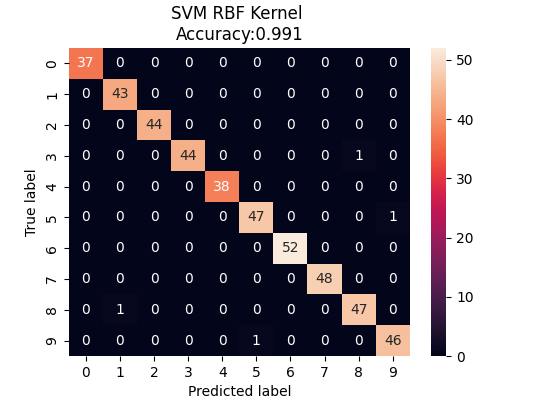

In [7]:
confusionmatrix_df = pd.DataFrame(confusion, 
                     index = [i for i in range(0,10)],
                     columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(confusionmatrix_df, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_digits, 
                                                                    predictions_digits)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [8]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_digits, predictions_digits, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_digits, predictions_digits, average = 'macro')))

print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_digits, predictions_digits, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_digits, predictions_digits, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)
Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)
